In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_f_from_polinom(polinom):
    def f(x):
        val = polinom[0]
        for i in range(len(polinom)-1):
            val = val*x+polinom[i+1]
        return val
    return f

In [23]:
a=-19.7997
b=28.9378
c=562.833

#P = [1, a, b, c]
P = [1, -1, 0, 0]
phi = get_f_from_polinom(P)

#def phi(x):
 #   return x**3 + a * x**2 + b * x + c


def mod(x, y):
    return x - np.floor(x/y) * y

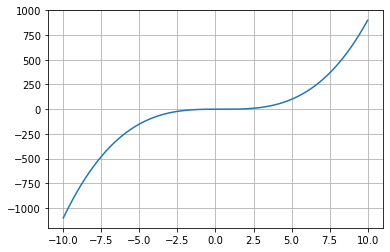

In [24]:
x = np.linspace(-10, 10, 1000)
plt.grid(True)
plt.plot(x, phi(x))
plt.show()

In [25]:
def get_neg_mod(P, P0):
    P = P.copy()
    P0 = P0.copy()
    while len(P) >= len(P0):
        P1 = P0.copy()
        dif = len(P) - len(P1)
        for _ in range(dif):
            P1.append(0)
        mod = []
        x = P[0] / P1[0]
        for i in range(len(P)):
            if np.isclose(P[i] - P1[i] * x, 0) and len(mod) == 0:
                continue
            mod.append(P[i] - P1[i] * x)
        P = mod
        print(P)
    P = [-x for x in P]
    return P

In [26]:
def shturm(polinom):
    P0 = np.polyder(polinom).tolist()
    f_k = [polinom, P0]
    while len(f_k[-1])>=2:
        f_k.append(get_neg_mod(f_k[-2], f_k[-1]))
    print(f_k)
    return f_k

In [27]:
f_k = shturm(P)
f_k

[-0.33333333333333337, 0.0, 0.0]
[-0.22222222222222224, 0.0]
[-2.0, 0.0]
[]
[[1, -1, 0, 0], [3, -2, 0], [0.22222222222222224, -0.0], []]


[[1, -1, 0, 0], [3, -2, 0], [0.22222222222222224, -0.0], []]

In [28]:
def N(x):
    l = []
    for i in f_k:
        s = 0
        for j in i:
            s *= x
            s += j
        l.append(s)
    count = 0
    for i in range(len(l) - 1):
        if l[i] * l[i + 1] < 0:
            count += 1
    print(l)
    return count

In [29]:
N(-10)

[-1100, 320, -2.2222222222222223, 0]


2

In [30]:
N(10)

[900, 280, 2.2222222222222223, 0]


0

In [31]:
N(-10) - N(10)

[-1100, 320, -2.2222222222222223, 0]
[900, 280, 2.2222222222222223, 0]


2

In [32]:
EPS = 1e-4

In [33]:
def get_bounds(a, b):
    if N(a) - N(b) == 0:
        return []
    if N(a) - N(b) == 1:
        return [(a, b)]
    m = a + (b - a) / (1.5 + np.random.random())
    return get_bounds(a, m) + get_bounds(m, b)

In [34]:
bounds = get_bounds(-10, 10)
bounds

[-1100, 320, -2.2222222222222223, 0]
[900, 280, 2.2222222222222223, 0]
[-1100, 320, -2.2222222222222223, 0]
[900, 280, 2.2222222222222223, 0]
[-1100, 320, -2.2222222222222223, 0]
[-3.4169580856386483, 7.056462381490069, -0.2746991012362171, 0]
[-3.4169580856386483, 7.056462381490069, -0.2746991012362171, 0]
[900, 280, 2.2222222222222223, 0]
[-3.4169580856386483, 7.056462381490069, -0.2746991012362171, 0]
[900, 280, 2.2222222222222223, 0]
[-3.4169580856386483, 7.056462381490069, -0.2746991012362171, 0]
[121.24938906534852, 73.8569203708453, 1.1791707866299055, 0]
[-3.4169580856386483, 7.056462381490069, -0.2746991012362171, 0]
[121.24938906534852, 73.8569203708453, 1.1791707866299055, 0]
[-3.4169580856386483, 7.056462381490069, -0.2746991012362171, 0]
[1.8521288712045618, 5.0004432205283855, 0.3703826817959381, 0]
[-3.4169580856386483, 7.056462381490069, -0.2746991012362171, 0]
[1.8521288712045618, 5.0004432205283855, 0.3703826817959381, 0]
[-3.4169580856386483, 7.056462381490069, -0.27

[(-1.2361459555629768, 0.23312991633714475),
 (0.23312991633714475, 1.6667220680817212)]

In [35]:
l0=l=bounds[0][0]
r0=r=bounds[0][1]

In [36]:
def dihotomia(l, r):
    iters=0
    while(abs(l-r)>EPS):
        m=(r+l)/2
        if phi(l)*phi(m)<0:
            r = m
        else:
            l = m
        iters += 1
    print(f"dihotomia = {iters} iters")

In [37]:
dihotomia(l0, r0)

dihotomia = 14 iters


In [38]:
print(f"l = {l}, r = {r}, невязка = {abs(phi(r)-phi(l))}")

l = -1.2361459555629768, r = 0.23312991633714475, невязка = 3.3752790356314586


In [43]:
def hord(polinom, l, r):
    P0 = np.polyder(polinom).tolist()
    P00 = np.polyder(P0).tolist()
    der_der_phi = get_f_from_polinom(P00)
    iters=0
    if phi(r)*der_der_phi(r)>0:
        def get_next(xn_1):
            return xn_1-phi(xn_1)*(r-xn_1)/(phi(r)-phi(xn_1))
        x0 = l
        while abs(get_next(x0)-x0)>1e-4:
            x0 = get_next(x0)
            iters+=1
    else:
        def get_next(xn_1):
            return xn_1-phi(xn_1)*(l-xn_1)/(phi(l)-phi(xn_1))
        x0 = b
        while abs(get_next(x0)-x0)>1e-4:
            x0 = get_next(x0)
            iters+=1
    print(f"hord = {iters} iters, x0 = {x0}")

In [46]:
hord(P, bounds[1][0], bounds[1][1])

hord = 26 iters, x0 = 0.9998059573941019


In [41]:
def newton(polinom, l, r):
    P0 = np.polyder(polinom).tolist()
    der_phi = get_f_from_polinom(P0)
    iters=0
    P00 = np.polyder(P0).tolist()
    der_der_phi = get_f_from_polinom(P00)
    if phi(r)*der_der_phi(r)>0:
        x0=r
    else:
        x0=l
    def get_next(xn_1):
        return xn_1 - phi(xn_1)/der_phi(xn_1)
    while(abs(x0-get_next(x0))>1e-4):
        x0 = get_next(x0)
        iters += 1
    print(f"newton = {iters} iters")
    print(x0)

In [42]:
newton(P, l0, r0)

newton = 10 iters
0.00016835445233541498
